# Percolation theory
[...] concerns itself with the study of clusters; it studies the frequency of clusters on a dimensions lattice $L \times L$ with some percolation probability $p$. In class we will work out examples on the 1 dimensional lattice and the Bethe lattice (locally tree-like). 

## 1D percolation
### Site percolation

The probablitiy of a site belonging to some cluster $s$ is defined by the fact that the cluster should be flanked by 2 white squares. As such the probability a site belonging to a cluster $s$ is given as:

$$ p(s_i \in s) = s (1 - p)^2 p^s  $$.

## Cluster size frequency
The cluster size frequency can be naively estimated as 

$N(s;p;L) = L s ( 1 - p)^2 p^s$.
In other words, it is the probability of any site belonging to cluster $s$ on a lattice $L$. Therefore, the lattice size has to be accounted for. 

However this would be wrong as a cluster $s$ can at most take up $L/s$ space on a 1D lattice. As such we would have to correct for this fact by dividing by $s$. Additionally, we want our metric to be independent of the lattice size $L$. 

$$ n(s;p) = \frac{N(s;p;L)}{L} = (1-p)^2 p^s.$$



In [2]:
import matplotlib.pyplot as plt, numpy as np
from matplotlib import style
style.use('seaborn-poster')
cluster_sizes = np.logspace(0, 5)
ps = np.linspace(0, 1, 10)
n_sp = (1 - ps)**2 * ps**(cluster_sizes[:, None])

fig, ax = plt.subplots()
for idx, p in enumerate(n_sp.T):
    ax.plot(cluster_sizes, p, label = ps[idx])
    p_zeta = -1 / np.log(ps[idx])
    ax.axvline(p_zeta, color = 'k', linestyle = 'dashed', alpha = .3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-15, 1)
ax.set(xlabel = 's', ylabel = 'n(s,p)')
ax.legend(title = 'p=', title_fontsize = 30)
fig.show()

/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


N.B. for any given $p$ the probability of larger cluster sizes decreases as a function of $s$. The onset of the rapid decay can be defined as 

\begin{aligned}
n(s,p) &= (1 - p)^2 p^s\\
       &= (1 - p)^2 \exp(s \log p)\\
       &= (1 - p)^2 \exp(- \frac{s}{s_{\zeta}})
\end{aligned}

with $s_\zeta (p) = - \frac{1}{\log p}$. To study the characteristic cluster size as a function of $p$, we recode $x = (1 - p)$ and study the limit as it approaches 0:

$$ s(x) = - \frac{1}{\log(1 - x)} \rightarrow \frac{1}{x} = \frac{1}{1-p}.$$

In other words, as the $p$ increases, the size of the cluster increases to infinity for infinite lattices. 



##  Average cluster size

\begin{aligned}
\chi &= \frac{1}{N_{occ}} \sum_k^N_{clu} s^2_k \\
        &=  \underbrace{ \frac{1} {N_{occ}} }_{N_{occ} = pL} \sum_s^\infty s^2 N(s;p;L)\\
        &=  \frac{1}{p} \sum_s^\infty s^2 n(s,p) \\
        &=  \frac{1}{\sum sn(s,p)} \sum_s^\infty s^2 n(s,p) 
        
\end{aligned}

## Correlation function
Let $r_i$ denote the position in the 1D lattice that is part of some cluster $s$ and $r_j$ denote some other site. We define the site-site correlation function $g$ as :
$$ g(r_i, r_j) = p^r \textrm {for } 0 \leq p \leq 1, $$
with $r = |r_i - r_j|$.

The larger the distance, the lower the correlation; 

$$ g(r_i, r_j) = \exp(\log p^r) = \exp(-\frac{r}{\zeta}) $$
with 

$$\zeta (p) = \frac{-1}{\log p} \rightarrow (1 - p)^{-1} \textrm{for } p \rightarrow 1^{-1}$$

## Correlation function and average cluster size
The correlation function and the average cluster size are related. Namely, for any position $r_i$ the probabliity of some other site $r_j$ belonging to the same cluster is given by $g(r_i, r_j)$. Taking the sum

\begin{aligned}
\sum_{r_j} p^{|r_i - r_j| } &= \dots + p^2 + p^1 + p^0 \\
                            &= \frac{1 + p}{1 - p}\\
                            &= \chi(p) \square
\end{aligned}

# Bethe lattice

A Bethe lattice is a tree in which each vertex has $z$ neighbors


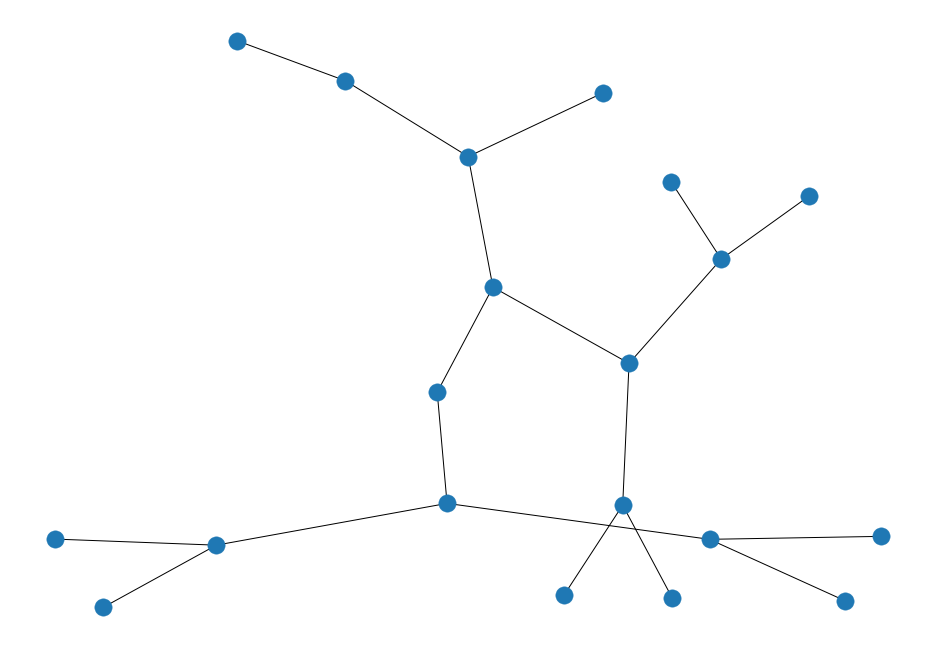

In [51]:
import networkx as nx
g = nx.full_rary_tree(2, 20)
nx.draw(g)

For any site to be occupied with probability $p$ we have $z-1$ branches available. Percolation can only occur when $$ p ( z - 1 ) \geq 1.$$
This means that we can write the critical occupation probability as 
$$ p_c = \frac{1}{z-1}$$

## Average cluster size

The Bethe lattice has some nice properties:
- It has no self-loops;
- For an infinite lattice, all sites are equal.

Let $B$ denote the contribution to the average cluster size from a given branch. Then the average cluster size to which the site belongs to is :

$$\chi(p) = 1 + zB $$
Remark: $B$ here should be interpreted as some average contribution per node in the branch of some size. The first term is the contribution of the site itself. Note sure what the $z$ is doing here however. For each link in the branch we can decompose $B$ by the contributions of its sub-branches;

$$ B = (1-p) 0 + p \big [ 1 + (z - 1) B \big] \textrm{for } 0 < p < p_c$$ 

which leads to 

$$ B = \frac{p}{1 - (z - 1) p}. $$

and 

$$\chi(p) = \frac{1 + p}{1 - (z -1)p}$$

# Transition to percolation
A percolating structure is one that is infinite in size. That is we may wonder what the probability $P$ is that a site belongs to a percolating cluster. For $p < p_c \rightarrow P_\infty(p)  = 0$ by definition.  For any other values higher than this threshold, we are able to compute the probability by using the inverse. Namely, let $Q_\infty (p)$ be the probability of a site note being connected to a percolating cluster. A site will therefore belong to the percolating cluster as :

$$ P_\infty(p) = p (1 - Q_\infty(p))$$
Similarly, we can say that the probability $Q$ is defined as the probabililty 

$$ Q_\infty(p) =  ( 1 - p ) + p Q^{z-1}_\infty(p) $$

[the probability that a sub-branch does not connect to the percolating cluster]

/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


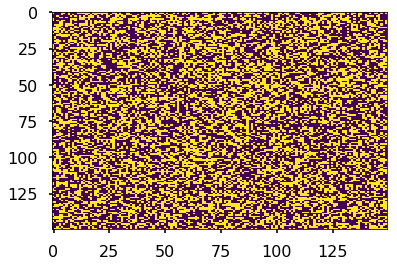

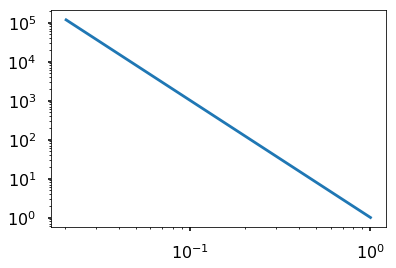

In [21]:
p = 0.55
N = 150
L = np.random.choice([0, 1], p = [p, 1 - p], size = (N, N))
fig, ax = plt.subplots()
ax.imshow(L, aspect = 'auto')
fig.show()


x = np.linspace(0, 1)
fig, ax = plt.subplots()
ax.plot(x, x**-3)
ax.set_xscale('log')
ax.set_yscale('log')
fig.show()